<a href="https://colab.research.google.com/github/dmakarau/LLM_explore/blob/main/GPT4_tokenizer_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# implementing all the import we need
!pip install tiktoken
import tiktoken

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import re


In [14]:
# importing ChatGPT4 tokenizer
tokenizer = tiktoken.get_encoding('cl100k_base')

# Exercise **1**

In [18]:

text = requests.get('https://www.gutenberg.org/files/35/35-0.txt').text
# split by puntuation
word_info = {}
words = re.split(r'([,.:;—?_!"“()\']|--|\s)',text)
words = [item.strip() for item in words if item.strip()]

tokenCount = np.zeros((len(words), 2), dtype=int)
for index, word in enumerate(words):
  tokenCount[index, 0] = len(word)
  tokenCount[index, 1] = len(tokenizer.encode(word))



[-0.02477682  0.01189933 -0.02803296 ... -0.08259971 -0.03821753
 -0.04667642]
[ 0.02233954 -0.04670443  0.04299773 ... -0.02174572 -0.10535828
 -0.00726864]


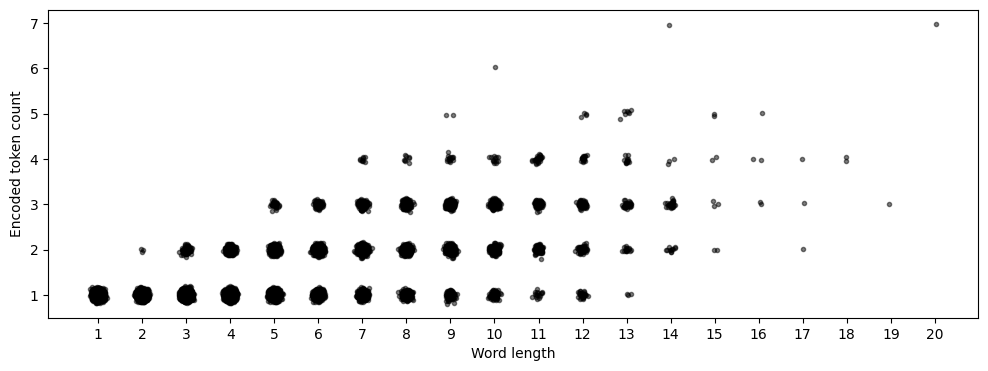

In [32]:
# visualise the token
plt.figure(figsize=(12,4))


offsetsX = np.random.randn(len(words))/20

offsetsY = np.random.randn(len(words)) / 20

plt.plot(tokenCount[:, 0] + offsetsX, tokenCount[:, 1] + offsetsY, '.k', alpha = .5)
plt.gca().set(xlabel='Word length', ylabel='Encoded token count', xticks=np.arange(1,np.max(tokenCount[:,0])+1))

plt.show()

# Exercise 2

In [58]:



# find words with characters
words_with_14_chars = set (np.where(tokenCount[:, 0] == 14)[0])
# print their tokens

for index in words_with_14_chars:
  decoded_tokens = [tokenizer.decode([token]) for token in tokenizer.encode(words[index])]
  print(f'"{words[index]}" comprises {decoded_tokens}')






aforementioned
[64, 1348, 37691]
"aforementioned" comprises ['a', 'fore', 'mentioned']
constellations
[1040, 616, 811]
"constellations" comprises ['const', 'ell', 'ations']
specialisation
[15495, 8082]
"specialisation" comprises ['special', 'isation']
conversational
[444, 3078, 1697]
"conversational" comprises ['con', 'vers', 'ational']
Time-Dimension
[1489, 9607, 18658]
"Time-Dimension" comprises ['Time', '-D', 'imension']
Psychologist’s
[69803, 16549, 753]
"Psychologist’s" comprises ['Psych', 'ologist', '’s']
north-eastward
[62995, 40607, 1637]
"north-eastward" comprises ['north', '-east', 'ward']
Undergrounders
[16648, 1993, 388]
"Undergrounders" comprises ['Under', 'ground', 'ers']
interpretation
[17324, 367]
"interpretation" comprises ['interpret', 'ation']
discriminating
[17242, 6417, 16252]
"discriminating" comprises ['disc', 'rim', 'inating']
mountaineering
[16966, 8511, 4776]
"mountaineering" comprises ['mount', 'aine', 'ering']
mathematicians
[10590, 12519, 5493]
"mathematici